<br />
<br />

<center><h1><b>Lecture 13</b></h1></center>
<center><h1><b>Scientific Computing and Data Visualization with Python II</b></h1></center>

<center><h4>Time: M56 (13:20 ~ 15:10) and R2 (09:00 ~ 09:50)</h4></center>
<br />

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs">Introduction to Computer and Computer Science</a>, 2022 Fall</h5></center>


## Last time

- Python package: NumPy  
- Python package: Matplotlib  

## **Today**

<html>
<head>
</head>
<body>
<ul>
  <li><a href="#tag1">More on Python package: NumPy</a></li>
  <li><a href="#tag2">More on Python package: Matplotlib</a></li>
  <!-- <li><a href="#tag3">???</a></li> -->
</ul>

</body>

<a id="tag1"></a>

## **More on Python package: `NumPy`**  

#### 2D array

- Can be directly ceated by `list` or other methods

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tmp = [
    [1,3,5,7,9],
    [2,4,6,8,10],
    ]
a = np.array(tmp)

print("a:", a)
print("dtype:", a.dtype)
print("shape:", a.shape)

a: [[ 1  3  5  7  9]
 [ 2  4  6  8 10]]
dtype: int32
shape: (2, 5)


<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/fig1.png">

In [7]:
print("a.sum():", a.sum())
print("a.mean():", a.mean())
print("a.sum(axis=0):", a.sum(axis=0))
print("a.mean(axis=1):", a.mean(axis=1))

a.sum(): 55
a.mean(): 5.5
a.sum(axis=0): [ 3  7 11 15 19]
a.mean(axis=1): [5. 6.]


#### `np.unravel_index`

- Converts a flat index or array of flat indices into a tuple of coordinate arrays.

- Syntax

    ```python
    np.unravel_index(indices, shape, order='C')
    ```

In [28]:
# b = np.random.randint(0, 99, size=(15,))
b = np.array([57,6,72,68,52,45,68,49,3,69,79,11,6,26,98])
c = b.copy().reshape(3,5)

print("b:", b)
print("c:\n", c)

b: [57  6 72 68 52 45 68 49  3 69 79 11  6 26 98]
c:
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]


In [22]:
print("Index of b.min():", np.argmin(b))
print("Index of c.min():", np.argmin(c))    # Return an index of flattened array
print("="*50)
print("Index of c.min():", np.unravel_index(np.argmin(c), c.shape))

Index of b.min(): 8
Index of c.min(): 8
Index of c.min(): (1, 3)


<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/fig2.png">

- - -

In [40]:
# Array reshape
print("c:\n", c)
print("c.ravel():\n", c.ravel())
print("c.reshape(-1):\n", c.reshape(-1))
print("c.flatten():\n", c.flatten())
# add new axis
print("c[np.newaxis,:].shape:", c[np.newaxis,:].shape)
print("c[None,:].shape:", c[None,:].shape)
print("c.reshape(1,3,5):", c.reshape(1,3,5).shape)
print("c[:,np.newaxis].shape:", c[:,np.newaxis].shape)
print("c[:,:,np.newaxis].shape:", c[:,:,np.newaxis].shape)

c:
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
c.ravel():
 [57  6 72 68 52 45 68 49  3 69 79 11  6 26 98]
c.reshape(-1):
 [57  6 72 68 52 45 68 49  3 69 79 11  6 26 98]
c.flatten():
 [57  6 72 68 52 45 68 49  3 69 79 11  6 26 98]
c[np.newaxis,:].shape: (1, 3, 5)
c[None,:].shape: (1, 3, 5)
c.reshape(1,3,5): (1, 3, 5)
c[:,np.newaxis].shape: (3, 1, 5)
c[:,:,np.newaxis].shape: (3, 5, 1)


#### Array combination and seperation

<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/fig3.png">

In [43]:
a = np.array([57,6,72,68,52,45,68,49,3,69,79,11,6,26,98]).reshape(3,5)

# horizontal split
# b, c = np.hsplit(a, [-2])
b, c = np.split(a, [-2], axis=1)

print("a:\n", a)
print("b:\n", b)
print("c:\n", c)

# vertical split
# d, e = np.vsplit(a, [-1])
d, e = np.split(a, [-1], axis=0)

print("d:\n", d)
print("e:\n", e)

a:
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
b:
 [[57  6 72]
 [45 68 49]
 [79 11  6]]
c:
 [[68 52]
 [ 3 69]
 [26 98]]
d:
 [[57  6 72 68 52]
 [45 68 49  3 69]]
e:
 [[79 11  6 26 98]]


In [44]:
print("np.c_[b,c]:\n", np.c_[b,c])
print("np.hstack((b,c)):\n", np.hstack((b,c)))
print("np.column_stack((b,c)):\n", np.column_stack((b,c)))
print("np.append(b,c,axis=1):\n", np.append(b,c,axis=1))
print("np.concatenate((b,c),axis=1):\n", np.concatenate((b,c),axis=1))

np.r_[b,c]:
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.hstack((b,c)):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.column_stack((b,c)):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.append(b,c,axis=1):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.concatenate((b,c),axis=1):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]


In [45]:
print("np.r_[d,e]:\n", np.r_[d,e])
print("np.vstack((d,e)):\n", np.vstack((d,e)))
print("np.row_stack((d,e)):\n", np.row_stack((d,e)))
print("np.append(d,e,axis=0):\n", np.append(d,e,axis=0))
print("np.concatenate((d,e),axis=0):\n", np.concatenate((d,e),axis=0))

np.r_[d,e]:
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.vstack((d,e)):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.row_stack((d,e)):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.append(d,e,axis=0):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]
np.concatenate((d,e),axis=0):
 [[57  6 72 68 52]
 [45 68 49  3 69]
 [79 11  6 26 98]]


#### Array padding

- Pad an array

<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/fig4.png">

In [59]:
a = np.array([57,6,72,68,52,45,68,49,3,69,79,11,6,26,98]).reshape(3,5)

print("np.pad(a, ((0,0),(2,0))):\n", np.pad(a, ((0,0),(2,0))))
print("np.pad(a, ((0,0),(0,2)), mode='reflect'):\n", np.pad(a, ((0,0),(0,2)), mode='reflect'))
print("np.pad(a, 1, mode='symmetric'):\n", np.pad(a, 1, mode='symmetric'))
print("np.pad(a, ((0,3),(2,2)), constant_values=1):\n", np.pad(a, ((0,3),(2,2)), constant_values=1))

np.pad(a, ((0,0),(2,0))):
 [[ 0  0 57  6 72 68 52]
 [ 0  0 45 68 49  3 69]
 [ 0  0 79 11  6 26 98]]
np.pad(a, ((0,0),(0,2)), mode='reflect'):
 [[57  6 72 68 52 68 72]
 [45 68 49  3 69  3 49]
 [79 11  6 26 98 26  6]]
np.pad(a, 1, mode='symmetric'):
 [[57 57  6 72 68 52 52]
 [57 57  6 72 68 52 52]
 [45 45 68 49  3 69 69]
 [79 79 11  6 26 98 98]
 [79 79 11  6 26 98 98]]
np.pad(a, ((0,3),(2,2)), constant_values=1):
 [[ 1  1 57  6 72 68 52  1  1]
 [ 1  1 45 68 49  3 69  1  1]
 [ 1  1 79 11  6 26 98  1  1]
 [ 1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1]]


#### 3D array or n-dimensional array

<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/fig5.png">

- - -

<a id="tag2"></a>

## **More on Python package: `Matplotlib`**  



#### Types of plotting in Matplotlib

- [Line plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html)
- [Shaded plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.fill_between.html)
- [Scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)
- [Boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html)
- [Histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html)

- - -

- [Heatmap](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist2d.html)
- [Contour map](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html)
- [Stream plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.streamplot.html) (To display 2D vector fields)
- [Imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)

Supplement: [Grid control](https://matplotlib.org/stable/tutorials/intermediate/gridspec.html)

#### Imshow

- Display data as an image, i.e., on a 2D regular raster.

- Syntax

    ```python
    Axes.imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, 
                vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, 
                filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    ```

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html)

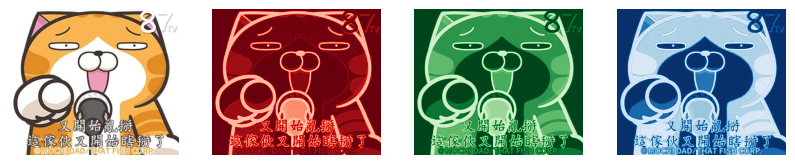

In [59]:
img = np.load(".//data//arr3d.npy")

fig = plt.figure(1, figsize=(10,4), dpi=100)
ax1 = fig.add_subplot(141)
ax1.imshow(img)
ax1.axis("off")
ax2 = fig.add_subplot(142)
ax2.imshow(img[:,:,0], cmap="Reds")
ax2.axis("off")
ax3 = fig.add_subplot(143)
ax3.imshow(img[:,:,1], cmap='Greens')
ax3.axis("off")
ax4 = fig.add_subplot(144)
ax4.imshow(img[:,:,2], cmap='Blues')
ax4.axis("off")

plt.show()

#### Exercise 1: Image

- Please write a program that plots below's figure.

- Your data is [here (exercise1.npy)](.//data//exercise1.npy)

    ```python
    img = np.load(".//data//exercise1.npy")
    ```

- How to generate graylevel image?  

$$
Y = 0.299 * R + 0.587 * G + 0.114 * B
$$

- - -

<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/exercise1.png">

- - -

#### 2D histogram

- Make a 2D histogram plot.

- Syntax

    ```python
    Axes.hist2d(x, y, bins=10, range=None, density=False, weights=None, cmin=None, cmax=None, *, data=None, **kwargs)
    ```

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist2d.html)

- - -

- Example 1: Normal distribution

$$
f(x;\mu, \sigma) = \dfrac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2}
$$

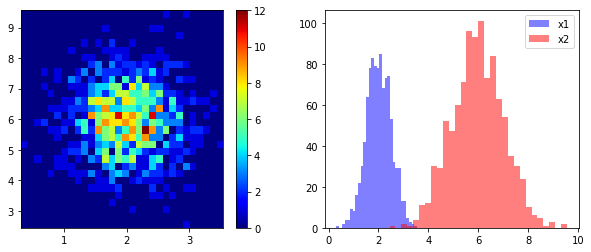

In [11]:
x1 = np.random.normal(loc=2., scale=0.5, size=1000)
x2 = np.random.normal(loc=6., scale=1., size=1000)

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(121)
h = ax1.hist2d(x1, x2, bins=30, cmap='jet')
plt.colorbar(h[3], ax=ax1)
ax2 = fig.add_subplot(122)
h = ax2.hist(x1, bins=30, facecolor='blue', alpha=0.5, label='x1')
h = ax2.hist(x2, bins=30, facecolor='red', alpha=0.5, label='x2')
ax2.legend()
plt.show()

#### Contour map

- Plot contour lines.

- Syntax

    ```python
    Axes.contour([X, Y,] Z, [levels,] alpha, cmap, linewidths, linestyles, **kwargs)
    Axes.contourf([X, Y,] Z, [levels,] alpha, cmap, linewidths, linestyles, **kwargs)
    ```

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html)

- - -

- Example: Himmelblau's function

$$
\begin{equation}
f(x,y) = (x^{2}+y-11)^{2} + (x+y^{2}-7)^{2}
\end{equation}
$$

- Four identical local minimum @$(3.00,2.00),(−2.81,3.13),(−3.80,−3.28),(3.58,−1.85)$

In [46]:
# Two ways to compute 2D function

# 1. Use np.meshgrid
x = np.linspace(-5, 5, 501)    # Create a 1D array, shape: (501,)
y = np.linspace(-5, 5, 501)    # Create a 1D array, shape: (501,)
xx ,yy = np.meshgrid(x, y)     # Create two 2D arrays, shape: (501, 501)
f1 = (xx**2 + yy - 11)**2 + (xx + yy**2 -7)**2

# 2. Use broadcasting
x = np.linspace(-5, 5, 501).reshape(1, -1)    # Create a 1D array then reshape into 2D, shape: (1, 501)
y = np.linspace(-5, 5, 501).reshape(-1, 1)    # Create a 1D array then reshape into 2D, shape: (1, 501)
f2 = (x**2 + y - 11)**2 + (x + y**2 -7)**2

# Verify f1 and f2
print("Is f1 equal to f2?\n", np.array_equal(f1, f2))

Is f1 equal to f2?
 True


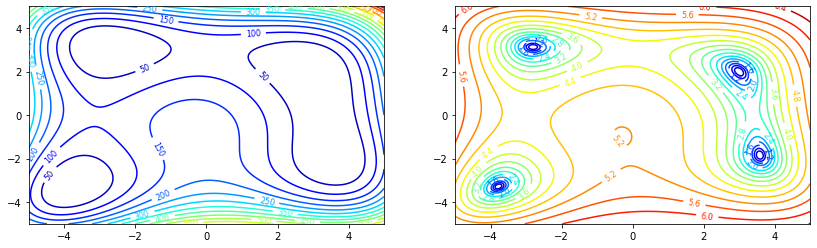

In [47]:
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(121)
im1 = ax1.contour(f2, cmap='jet', levels=20, extent=[-5, 5, -5, 5])
ax1.clabel(im1, inline=True, fontsize=8)
# Use logarithm to enhance the contrast
ax2 = fig.add_subplot(122)
im2 = ax2.contour(xx, yy, np.log(1+f2), cmap='jet', levels=20, extent=[-5, 5, -5, 5])
ax2.clabel(im2, inline=True, fontsize=8)

plt.show()

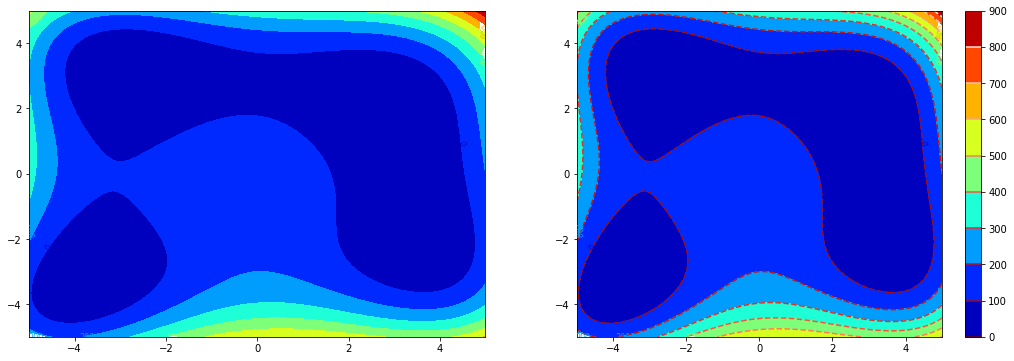

In [58]:
fig = plt.figure(figsize=(18, 6))

# contourf
ax1 = fig.add_subplot(121)
im1 = ax1.contourf(f2, cmap='jet', levels=10, extent=[-5, 5, -5, 5])
ax1.clabel(im1, levels=im1.levels[::2], inline=True, fontsize=8)

# Use logarithm to enhance the contrast
ax2 = fig.add_subplot(122)
im2 = ax2.contourf(f2, cmap='jet', levels=10, extent=[-5, 5, -5, 5])
ax2.clabel(im2, levels=im2.levels[::2], inline=True, fontsize=8)
# Add contour lines
im3 = ax2.contour(f2, cmap='Reds_r', levels=im1.levels[::1], linestyles='dashed', extent=[-5, 5, -5, 5])
cbar = fig.colorbar(im2)
cbar.add_lines(im3)

plt.show()

#### Stream plot

- Draw streamlines of a vector flow.

- Syntax

    ```python
    Axes.streamplot(x, y, u, v, density=1, linewidth=None, color=None, cmap=None, norm=None, 
                    arrowsize=1, arrowstyle='-|>', minlength=0.1,
                    transform=None, zorder=None, start_points=None, maxlength=4.0, 
                    integration_direction='both', broken_streamlines=True, *, data=None)
    ```

    * x, y: Evenly spaced strictly increasing arrays to make a grid.
    * u, v: $x$ and $y$-velocities. The number of rows and columns must match the length of y and x, respectively.  
<br>

- [Documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.streamplot.html)

- Example: Himmelblau's function

$$
\begin{equation}
f(x,y) = (x^{2}+y-11)^{2} + (x+y^{2}-7)^{2}
\end{equation}
$$

$$
\begin{align}
\nabla f(x,y) &= \dfrac{\partial f}{\partial x} \hat{x} + \dfrac{\partial f}{\partial y} \hat{y} \\
\rightarrow u &= \dfrac{\partial f}{\partial x} = 4 x^3 + 4xy + 2y^2 - 42x - 14 \\
\rightarrow v &= \dfrac{\partial f}{\partial y} = 4 y^3 + 4xy + 2x^2 - 26y - 22
\end{align}
$$

In [66]:
x = np.linspace(-5, 5, 501).reshape(1, -1)    # Create a 1D array then reshape into 2D, shape: (1, 501)
y = np.linspace(-5, 5, 501).reshape(-1, 1)    # Create a 1D array then reshape into 2D, shape: (1, 501)
f = (x**2 + y - 11)**2 + (x + y**2 -7)**2
u = 4*x**3 + 4*x*y + 2*y**2 - 42*x - 14
v = 4*y**3 + 4*x*x + 2*x**2 - 26*y - 22

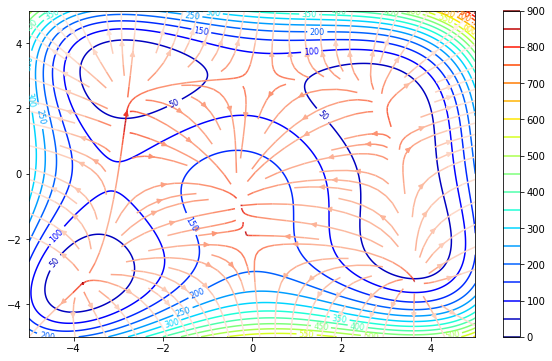

In [79]:
fig = plt.figure(figsize=(10, 6))

ax1 = fig.add_subplot(111)
im1 = ax1.contour(f, cmap='jet', levels=20, extent=[-5, 5, -5, 5])
ax1.clabel(im1, inline=True, fontsize=8)

color = np.log(np.hypot(u, v))
# im2 = ax1.streamplot(x, y, u, v, color=color, cmap="terrain")
im2 = ax1.streamplot(x, y, u, v, color=color, cmap="Reds_r")

plt.colorbar(im1, ax=ax1)
plt.show()

#### Exercise 2: electric field of point charges

$$
\begin{equation}
V_{net} = \sum_{i}{V_{i}} = \dfrac{1}{4\pi\epsilon_{0}} \sum_{i}{\dfrac{q_{i}}{r_{i}}}
, \; \text{where} \; r_{i} = \sqrt{(x-x_i)^2 + (y-y_i)^2} 
\; \text{and} \; (x_i, y_i) \; \text{is the location of point source}
\end{equation}
$$



$$
\begin{aligned}
E_{i} = -\nabla V_{i} &= -\dfrac{\partial V_{i}}{\partial x} \hat{x} -\dfrac{\partial V_{i}}{\partial y} \hat{y} \\
\rightarrow E_{i,x} &= -\dfrac{\partial V_{i}}{\partial x}= \dfrac{1}{4\pi\epsilon_{0}} \sum_{i}{\dfrac{q}{r_{i}^{3}} \cdot (x-x_i)}\\
\rightarrow E_{i,y} &= -\dfrac{\partial V_{i}}{\partial y}= \dfrac{1}{4\pi\epsilon_{0}} \sum_{i}{\dfrac{q}{r_{i}^{3}} \cdot (y-y_i)}\\
\rightarrow E_{i} &= \dfrac{1}{4\pi\epsilon_{0}} \sum_{i}{\dfrac{q_i}{r_{i}^{2}}}
\end{aligned}
$$

- Please write a program that plots the electric field of the following conditions:  

    1. 1 positive charge $(+q)$ at $(1, 1)$ and 1 negative charge $(-q)$ at $(-1, -1)$
    2. 2 positive charges $(+q)$ at $(1, 1), (-1,-1)$ and 2 negative charges $(-q)$ at $(1, -1), (-1, 1)$

- - -

#### Exercise 2-1

<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/exercise2-1.png">

- - -

#### Exercise 2-2

<img align="center" height=auto width=500px src="https://raw.githubusercontent.com/bruce88617/nycudopcs/main/Lectures/Lecture13/assets/exercise2-2.png">

- - -

<details><summary>Click here for solution</summary>

    ```python
    import numpy as np
    import matplotlib.pyplot as plt

    def electricPotential(x, y, charges, positions):
        k = (4 * np.pi * 8.854e-12)**(-1)
        V = np.zeros_like(x)
        for charge, position in zip(charges, positions):
            V += k*charge / np.sqrt((x-position[0]) ** 2 + (y-position[1]) ** 2)
        return V

    def electricField(x, y, charges, positions):
        k = (4 * np.pi * 8.854e-12)**(-1)
        Ex = np.zeros_like(x)
        Ey = np.zeros_like(x)
        for charge, position in zip(charges, positions):
            den = np.hypot(x-position[0], y-position[1]) ** 3
            Ex += k*charge * (x - position[0]) / den
            Ey += k*charge * (y - position[1]) / den
        return Ex, Ey

    x = np.linspace(-3, 3, 200)
    y = np.linspace(-3, 3, 200)
    xx, yy = np.meshgrid(x, y)

    # 1
    charges = [-1., 1.]
    positions = [(-1, -1), (1, 1)]

    V = electricPotential(xx, yy, charges, positions)
    Ex, Ey = electricField(xx, yy, charges, positions)

    fig = plt.figure(1, figsize=(10, 6), dpi=100)

    ax1 = fig.add_subplot(111)
    im1 = ax1.imshow(V, origin='lower', cmap='bwr', extent=[-3,3,-3,3])
    ax1.grid(True)

    color = np.log(np.hypot(Ex, Ey))
    im2 = ax1.streamplot(x, y, Ex, Ey, color=color, cmap="terrain")

    plt.colorbar(im1, ax=ax1)
    plt.show()

    ```

</details>